In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


0                 2000.0 meter
1                 1995.1 meter
2     1980.3999999999999 meter
3     1955.8999999999999 meter
4                 1921.6 meter
5                 1877.5 meter
6                 1823.6 meter
7     1759.8999999999999 meter
8     1686.3999999999999 meter
9                 1603.1 meter
10                1510.0 meter
11                1407.1 meter
12    1294.3999999999999 meter
13    1171.8999999999999 meter
14                1039.6 meter
15     897.4999999999999 meter
Name: y, dtype: object
0                     0.0 meter / second
1      -9.799999999999999 meter / second
2     -19.599999999999998 meter / second
3                   -29.4 meter / second
4     -39.199999999999996 meter / second
5      -48.99999999999999 meter / second
6      -58.79999999999999 meter / second
7                   -68.6 meter / second
8      -78.39999999999999 meter / second
9      -88.19999999999999 meter / second
10     -97.99999999999999 meter / second
11    -107.79999999999998 mete

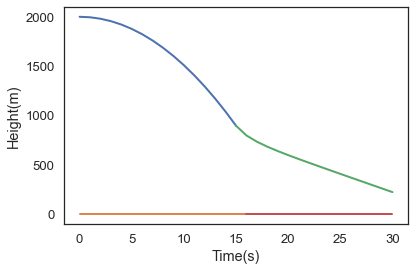

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
m = UNITS.meter
s = UNITS.second
g = 9.8 * m/s**2
init_z = State(y=2000.0 * m, v=0.0 * m/s)
t_fend = 30* s
t_open=15*s
dt = 1* s
system1_z=System(init=init_z,g=g,t_end=t_open,dt=dt)
def slope_func1_z(state, t, system1):
    y,v = state
    dydt = v
    dvdt = -system1.g
    return dydt, dvdt
Vz, Az = slope_func1_z(system1_z.init, 0, system1_z)
def run_rk4(system, slope_func, **options):
    # the default message if nothing changes
    msg = "The solver successfully reached the end of the integration interval."
    # get parameters from system
    init, t_0, t_end, dt = check_system(system, slope_func)
    # make the TimeFrame
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt) * get_units(t_end)
    # run the solver
    for t1 in ts:
        y1 = frame.row[t1]
        slopes1 = slope_func(y1, t1, system)
        t12= t1+0.5*dt
        y12= [y+0.5*slope1*dt for y,slope1 in zip(y1,slopes1)]
        slopes2 = slope_func(y12, t12, system) 
        y13= [y+0.5*dt*slope2 for y,slope2 in zip(y1,slopes2)]
        t13= t1+0.5*dt
        slopes3 = slope_func(y13, t13, system)
        y14= [y+dt*slope3 for y,slope3 in zip(y1,slopes3)]
        t14= t1+dt
        slopes4 = slope_func(y14, t14, system) 
        y2 = [y +dt*(slope1+2*slope2+2*slope3+slope4)/6 for
              y,slope1,slope2,slope3,slope4 in zip(y1,slopes1,slopes2,slopes3,slopes4)]
        t2 = t1 + dt
        frame.row[t2] = y2
    details = ModSimSeries(dict(message="Success"))
    return frame, details
results1_z, details1_z = run_rk4(system1_z, slope_func1_z)
plot(results1_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[0,2,4,6,8,10,12,14,16]
y=[0,0,0,0,0,0,0,0,0]
plot(x,y)
print(results1_z.y)
print(results1_z.v)
kg= UNITS.kilogram
S = 20.0 * m**2
ρ = 1.225 * kg/m**3
Yp=get_last_value(results1_z.y) 
Vp=get_last_value(results1_z.v)
print(Yp)
print(Vp)
process_z=State(y=Yp,v=Vp)
system2_z= System(init=process_z, t_end=t_fend,t_0=t_open, dt=dt) 
def slope_func2_z(state,t,system2):
    y,v=state
    dydt=v
    Drag=0.5*v*v*S*0.05*ρ  
    dvdt=Drag/(85.0*kg)-g
    return dydt, dvdt
Vz1,Az1=slope_func2_z(system2_z.init, 0, system2_z)
results2_z,details2_z=run_rk4(system2_z, slope_func2_z) #system2_z相当于给出了初始条件（包括初值，末值等）和步长；
                                                          #slope_func2_z相当于给出了微分方程的形式
plot(results2_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[16,18,20,22,24,26,28,30]
y=[0,0,0,0,0,0,0,0]
plot(x,y)
print(results2_z.y)
print(results2_z.v)